## 考题01-用户数据清洗及处理

In [4]:
import pandas as pd
data1 = pd.read_excel('zhihu_users.xlsx')

In [5]:
def data_cleaning(data):
    for i in data.columns:
        if (data[i].dtype==object):
            data[i].fillna('缺失数据',inplace=True)
        if (data[i].dtype==int or data[i].dtype==float):
            data[i].fillna(0,inplace=True)
            data[i] = data[i].astype(int)
    return data

In [6]:
data1_c = data_cleaning(data1)
data1_c.head(10)

,用户id,关注的收藏夹,关注,关注者,关注的问题,关注的话题,关注的专栏,职业1,职业2,回答,提问,收藏,居住地,所在行业,教育经历,职业经历
0,da03c9720a17,1,16,5,42,27,0,金融,财务,0,0,0,缺失数据,财务,缺失数据,缺失数据
1,da03c9720a19,39,39,16,4,3,25,缺失数据,缺失数据,0,1,5,山东,缺失数据,缺失数据,缺失数据
2,da03c9720a21,8,41,18,71,39,3,服务业,人力资源,9,0,2,广东,人力资源,缺失数据,缺失数据
3,da03c9720a23,18,122,2,67,187,3,缺失数据,缺失数据,0,0,36,缺失数据,缺失数据,缺失数据,缺失数据
4,da03c9720a27,33,43,12,81,36,7,高新科技,电子商务,38,2,21,山东,电子商务,缺失数据,缺失数据
5,da03c9720a2f,31,47,4,137,36,1,信息传媒,广播电视,2,0,19,缺失数据,广播电视,缺失数据,广播电视 · 工程师
6,da03c9720a37,16,12,2,79,1,0,缺失数据,缺失数据,0,0,0,缺失数据,缺失数据,缺失数据,缺失数据
7,da03c9720a43,13725,315,2805,50,6,875,缺失数据,缺失数据,0,0,0,北京,缺失数据,缺失数据,微信公众号 · 亦无欢
8,da03c9720a49,140,308,121,402,13,17,缺失数据,缺失数据,59,1,27,广东,缺失数据,缺失数据,缺失数据
9,da03c9720a4b,95,30,1,3,1,21,缺失数据,缺失数据,0,0,0,缺失数据,缺失数据,缺失数据,缺失数据


## 考题02-用户指标分布分析

In [7]:
data2 = pd.read_excel('6th_census.xlsx')
province = data2[data2['结尾'] == "省"]['地区'].reset_index(drop=True).str.replace('省','')
city = data2[data2['结尾'] == "市"]['地区'].reset_index(drop=True).str.replace('市','')
def get_province(city):
    result = data2[data2['地区'] == str(city) + "市"]['省'].reset_index(drop=True).str.replace('省','')
    if(len(result) != 0):
        return (result[0])

#print(province)

In [8]:
location_list = data1_c['居住地'].value_counts()

user_in_province = [0] * (len(province) + 4)

for i in location_list.index:
    if(i == "北京"):
        user_in_province[len(province)] += 1
    elif(i == "上海"):
        user_in_province[len(province) + 1] += 1
    elif(i == "天津"):
        user_in_province[len(province) + 2] += 1
    elif(i == "重庆"):
        user_in_province[len(province) + 3] += 1
    else:  
        if(str(i) in province.to_string()): #是否为一个省
            index = province[province.values == i].index[0]
            user_in_province[index] = location_list[i]

        if(get_province(i) is not None): #是否属于某省
            index = province[province.values == get_province(i)].index[0]
            user_in_province[index] += 1

print(user_in_province)

[34, 65, 7, 266, 7, 3, 25, 48, 24, 87, 53, 17, 193, 21, 37, 5, 97, 18, 73, 89, 15, 139, 1, 1, 1, 1]


In [9]:
def normalization(x):
    x_ = (x - x.min())/(x.max()+x.min()) * 100
    return x_

In [10]:
population = [0] * (len(province) + 4)
for i, v in enumerate(province):
    population[i] = data2[data2['地区'] == v + "省"]['常住人口'].values[0]

population[len(province)] = data2[data2['地区'] == '北京市']['常住人口'].values[0]
population[len(province) + 1] = data2[data2['地区'] == '上海市']['常住人口'].values[0]
population[len(province) + 2] = data2[data2['地区'] == '天津市']['常住人口'].values[0]
population[len(province) + 3] = data2[data2['地区'] == '重庆市']['常住人口'].values[0]

In [11]:
import numpy as np
np_user_in_province = np.array(user_in_province)
np_population = np.array(population)

nor_data_1 = normalization(np_population)
nor_data_2 = normalization(np_user_in_province)

nor_data_3 = nor_data_2/nor_data_1

['安徽', '福建', '甘肃', '广东', '贵州', '海南', '河北', '河南', '黑龙江', '湖北', '湖南', '吉林', '江苏', '江西', '辽宁', '青海', '山东', '山西', '陕西', '四川', '云南', '浙江']


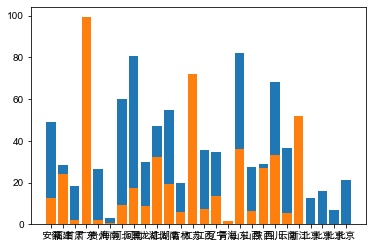

In [75]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

name_list = province.values.tolist()
print(name_list)
name_list.append(u"北京")
name_list.append(u"北京")
name_list.append(u"北京")
name_list.append(u"北京")

plt.bar(range(len(nor_data_1)), nor_data_1, tick_label=name_list)
plt.bar(range(len(nor_data_3)), nor_data_2, tick_label=name_list)

plt.show()

## 考题03-用户指标分布分析

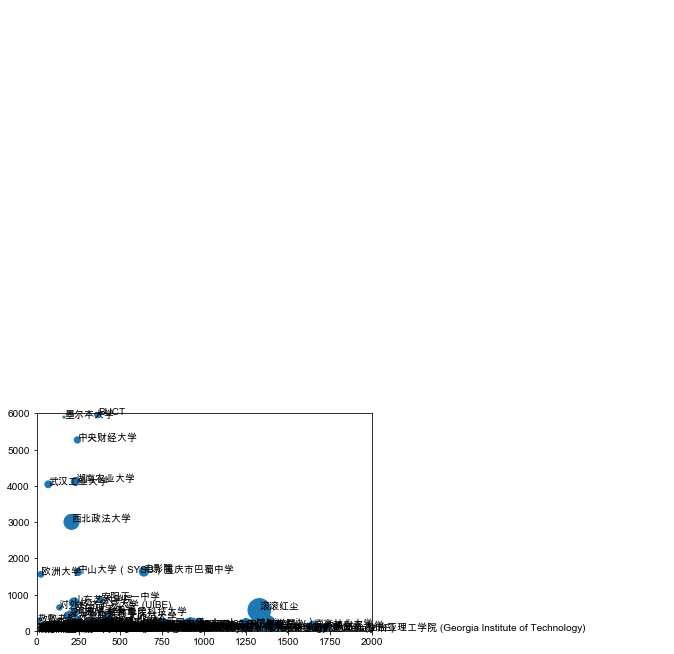

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

core_activity = data1_c['关注的收藏夹'] + data1_c['关注的问题'] + data1_c['关注的话题'] + data1_c['关注的专栏']
number_of_fans = data1_c['关注者']
school = data1_c['教育经历']
number_of_followers = data1_c['关注']

draw_list = []
for i in range(len(core_activity)):
    draw_list.append([number_of_followers[i], number_of_fans[i], core_activity[i], school[i]])

df = pd.DataFrame(draw_list, columns=['number_of_followers','number_of_fans','core_activity','school'])
df = df.groupby('school').filter(lambda x: x['core_activity'].mean() > 1000)
df = df.reset_index(drop=True)

x = df['number_of_followers']
y = df['number_of_fans']
s = df['core_activity'] /30

txt = df['school'].values

plt.scatter(x, y, s=s)

for i in range(len(txt)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]+0.1, y[i]+0.1))

plt.xlim(0, 2000)
plt.ylim(0, 6000)
'''
hol_mean = df['width'].mean()
ver_mean = df['length'].mean()

plt.axhline(hol_mean, label="mean width:%f" % hol_mean, color='r', linestyle="--", alpha=0.8)
plt.axvline(ver_mean, label="mean width:%f" % ver_mean, color='g', linestyle="--", alpha=0.8)
plt.legend(loc = 'upper left')
'''
plt.show()